## Ejercicio de Aplicación de Modelos Autorregresivos con rezagos distribuidos (ARDL)
En este ejercicio conocerás cómo crear modelos de tipo ARDL. El objetivo es el generar este modelo para identificar si existe algun tipo de relacion a corto y largo plazo con las variables de precio de las acciones de amazon. Recuerda que usaremos la libreria ardl en R, la cual tiene funciones muy utiles para generar el modelo, identificar los multiplicadores a corto y largo plazo y realizar el ARDL basado en la corrección de errores.


**Contenido**
1. [Datos:](#1)
 1. [Datos: Preprocesamiento](#2)
       1. [Importación de librerías requeridas](#3)
       1. [Descarga de datos financieros](#4)
       1. [Generación de formato ts](#5)
       1. [Visualización de las series de interés](#6)
       1. [Prueba de estacionariedad](#7)
1. [Modelos ARDL](#8)
    1. [Predicción](#8a)
    1. [Bound test para la verificacion de relaciones a largo y corto termino](#9)
    1. [Mutiplicadores de largo y corto termino](#10)


<a id="1"></a> <br>
## 1. Datos y Modelamiento

<a id="2"></a> <br>
#### A. Datos: Preprocesamiento

Esta sección básicamente involucra desde la descarga de los datos financieros y eliminación de datos faltantes, su visualización, adecuado formato de series de tiempo; que son procesos necesarios previos al modelamiento.

<a id="3"></a> <br>
##### a. Importación de librerías requeridas

A continuación, importaremos las librerías necesarias. Estos paquetes comprenden aquellos para la descarga y manipulación de datos financieros, para la visualización y el modelamiento. En la segunda parte de este tutorial, llamaremos otras librerías que serán útiles para el pronóstico futuro.

In [2]:
### Para el modelado
library(ARDL)

#Otros de manipulación de datos
library(forecast)
library(tseries)
library(tidyverse)
library(urca)
library(quantmod)
library(TSstudio)
library(dygraphs)
theme_set(theme_bw())
options(warn = - 1) 

<a id="4"></a> <br>
##### b. Descarga de datos


In [3]:
###Función para obtener datos:
start<-format(as.Date("2014-01-01"),"%Y-%m-%d")
end<-format(as.Date("2021-06-30"),"%Y-%m-%d")

In [4]:
#funcion para obtener los precios
precios <-function(simbolo)
{
  ##Obtener precios stocks de Yahoo FInance
  datos <- getSymbols(simbolo, auto.assign = FALSE, from=start, to=end)
  ## Elimar faltantes:
  datos<-na.omit(datos)
  ##mantener columnas con precios maximo, minimo, de cierre y volumen de mercado:
  datos <- datos[,4]
  ##Para hacerlo datos accesibles en el global environment:
  assign(simbolo, datos, envir = .GlobalEnv)
}

In [5]:
##Llamar el activo de interés, pueden ser varios:
precios("SPY")
precios("AMZN")
precios("AAPL")
precios("META")

<a id="5"></a> <br>
##### c. Generación de formato ts.

In [6]:
#Ya que tenemos que trabajar en formato ts
## Juntamos los datos, renombramos las columnas y las visualizamos:
prices<-merge.xts(`SPY`, `AMZN`, `AAPL`, `META`, join = "inner")
dim(prices)
colnames(prices)<-c("SPY", "AMZN", "AAPL", "META")

s1=`SPY`
s2=`AMZN`
s3=`AAPL`
s4=`META`


#Podemos identificar la longitud de cada uno
length(s1)
length(s2)
length(s3)
length(s4)


[1] 1886    4

[1] 1886

[1] 1886

[1] 1886

[1] 1886

<a id="6"></a> <br>
##### d. Visualización de las series de interés

In [7]:
#Podemos  visualizar la serie de tiempo 

dygraph(prices, main = c("SPY", "AMZN", "AAPL", "META")) %>%
  dyAxis("y", label = "Prices") %>%
  dyOptions(colors = RColorBrewer::brewer.pal(4, "Set1"))

HTML widgets cannot be represented in plain text (need html)

<a id="7"></a> <br>
##### d. Prueba de estacionariedad

In [8]:
install.packages("fUnitRoots")


Installing package into ‘/Users/U1037319/Library/R/arm64/4.2/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/17/sp2d8jj91lqbmd466bh0l7mm0000gn/T//RtmpOSEofQ/downloaded_packages



Attaching package: ‘fUnitRoots’


The following objects are masked from ‘package:urca’:

    punitroot, qunitroot, unitrootTable




In [9]:
library(fUnitRoots)

In [10]:
# Comprobemos que las series no son estacionarias.
library(fUnitRoots)
adf.test(s1)
adf.test(s2)
adf.test(s3)
adf.test(s4)


	Augmented Dickey-Fuller Test

data:  s1
Dickey-Fuller = -1.9016, Lag order = 12, p-value = 0.62
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  s2
Dickey-Fuller = -2.0275, Lag order = 12, p-value = 0.5667
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  s3
Dickey-Fuller = -0.71561, Lag order = 12, p-value = 0.9692
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  s4
Dickey-Fuller = -1.3861, Lag order = 12, p-value = 0.8382
alternative hypothesis: stationary


In [12]:
library(dbplyr)
adf.test(diff(s1)%>%na.omit())
adf.test(diff(s2)%>%na.omit())
adf.test(diff(s3)%>%na.omit())
adf.test(diff(s4)%>%na.omit())


	Augmented Dickey-Fuller Test

data:  diff(s1) %>% na.omit()
Dickey-Fuller = -12.136, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff(s2) %>% na.omit()
Dickey-Fuller = -13.118, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff(s3) %>% na.omit()
Dickey-Fuller = -12.105, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff(s4) %>% na.omit()
Dickey-Fuller = -13.415, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary


Como se observa, las series son I(1), por lo que ARDL aplica.

<a id="8"></a> <br>
## 2. Construcción modelo ARDL
Una de las caracteristicas de este paquete, siendo una gran ventaja, es que no requiere de tanto procesamiento de las series de tiempo. Por tal motivo una vez se realiza la partición de los datos podemos entrenar el modelo. Es decir, al especificar el orden p y q para las variables, la funciión internamente genera los lags de estas.

In [13]:
pr_df=as.data.frame(prices)

#Se realiza una búsqueda tipo grid search:
#Selección automatica:
models <- auto_ardl(SPY ~ AMZN + AAPL + META, data = pr_df, max_order = 6)


In [14]:
#Revisemos el top 20 de los mejores modelos según su critrio de información de Akaike
models$top_orders

SPY,AMZN,AAPL,META,AIC
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,6,4,5,7885.472
5,6,4,4,7885.777
5,6,4,5,7885.998
3,6,4,6,7886.401
3,6,5,5,7887.096
4,6,4,5,7887.280
5,6,5,4,7887.775
5,6,5,5,7887.972
4,6,4,6,7888.200


In [15]:
#Procedemos a construir el modelo de regresión con la mejor combinación.
mod1 <- ardl(SPY ~ AMZN + AAPL + META, data = pr_df, order = c(3,6,4,5))
summary(mod1)


Time series regression with "ts" data:
Start = 7, End = 1886

Call:
dynlm::dynlm(formula = full_formula, data = data, start = start, 
    end = end)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1687  -0.7239   0.0861   0.9345  10.7749 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.64582    0.53439   3.080  0.00210 ** 
L(SPY, 1)    0.98536    0.02322  42.442  < 2e-16 ***
L(SPY, 2)    0.04628    0.03257   1.421  0.15555    
L(SPY, 3)   -0.04380    0.02324  -1.884  0.05967 .  
AMZN         0.26506    0.04077   6.501 1.02e-10 ***
L(AMZN, 1)  -0.33998    0.05837  -5.825 6.73e-09 ***
L(AMZN, 2)   0.06866    0.05876   1.168  0.24282    
L(AMZN, 3)   0.06652    0.05838   1.140  0.25460    
L(AMZN, 4)  -0.11372    0.05568  -2.042  0.04126 *  
L(AMZN, 5)   0.11454    0.04645   2.466  0.01376 *  
L(AMZN, 6)  -0.06068    0.02890  -2.099  0.03592 *  
AAPL         1.07434    0.05122  20.975  < 2e-16 ***
L(AAPL, 1)  -1.15666    0.07623 -15.173  <

In [16]:
# Para la interpretación, podemos imprimir los rezagos correspondientes de cada variable que explican la respuesta.
mod1$full_formula

SPY ~ L(SPY, 1) + L(SPY, 2) + L(SPY, 3) + AMZN + L(AMZN, 1) + 
    L(AMZN, 2) + L(AMZN, 3) + L(AMZN, 4) + L(AMZN, 5) + L(AMZN, 
    6) + AAPL + L(AAPL, 1) + L(AAPL, 2) + L(AAPL, 3) + L(AAPL, 
    4) + META + L(META, 1) + L(META, 2) + L(META, 3) + L(META, 
    4) + L(META, 5)

In [17]:
class(mod1)
names(mod1)

[1] "dynlm" "lm"    "ardl"

[1] "coefficients"   "residuals"      "effects"        "rank"          
 [5] "fitted.values"  "assign"         "qr"             "df.residual"   
 [9] "xlevels"        "call"           "terms"          "model"         
[13] "index"          "frequency"      "twostage"       "order"         
[17] "data"           "parsed_formula" "full_formula"

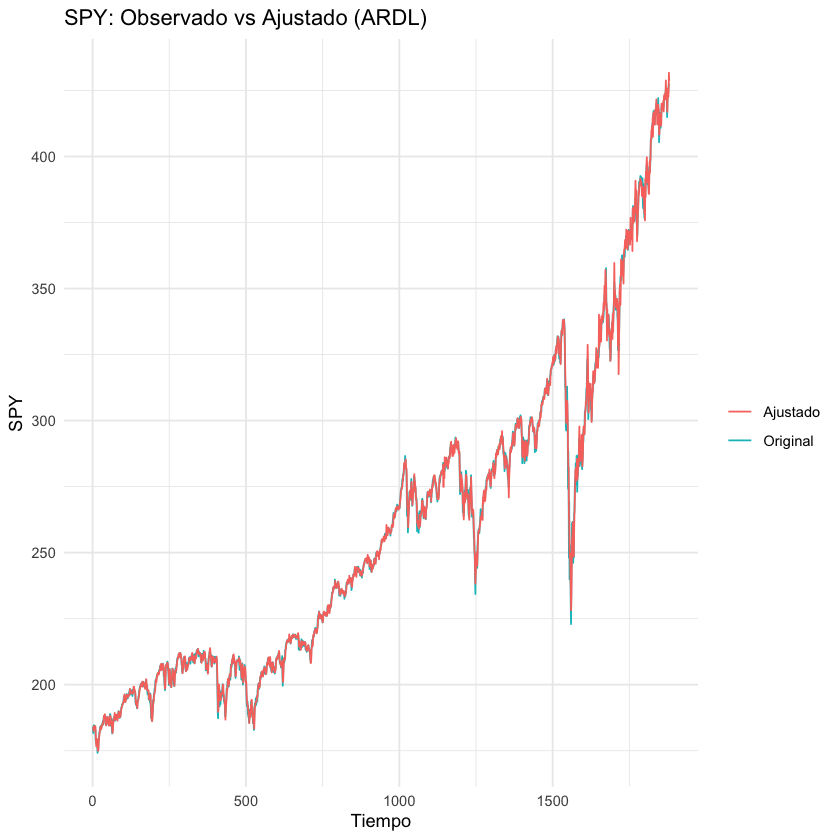

In [18]:
fitted_vals <- mod1$fitted.values
pr_df_adj <- tail(pr_df, length(fitted_vals))  # igualamos las dimensiones, pues por los rezagos, no quedaban dimensiones iguales.

pr_df_adj$fitted <- fitted_vals  

library(ggplot2)
ggplot(pr_df_adj, aes(x = 1:nrow(pr_df_adj))) +
  geom_line(aes(y = SPY, color = "Original")) +
  geom_line(aes(y = fitted, color = "Ajustado")) +
  labs(title = "SPY: Observado vs Ajustado (ARDL)",
       x = "Tiempo",
       y = "SPY",
       color = "") +
  theme_minimal()

<a id="8a"></a> <br>
### Predicción
Procedemos ahora con la predicción del modelo.

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1887       428.6397 423.3967 433.8827 420.6212 436.6582
1888       428.6397 421.2251 436.0542 417.3001 439.9792
1889       428.6397 419.5587 437.7207 414.7515 442.5278
1890       428.6397 418.1537 439.1256 412.6028 444.6766
1891       428.6397 416.9158 440.3636 410.7096 446.5698

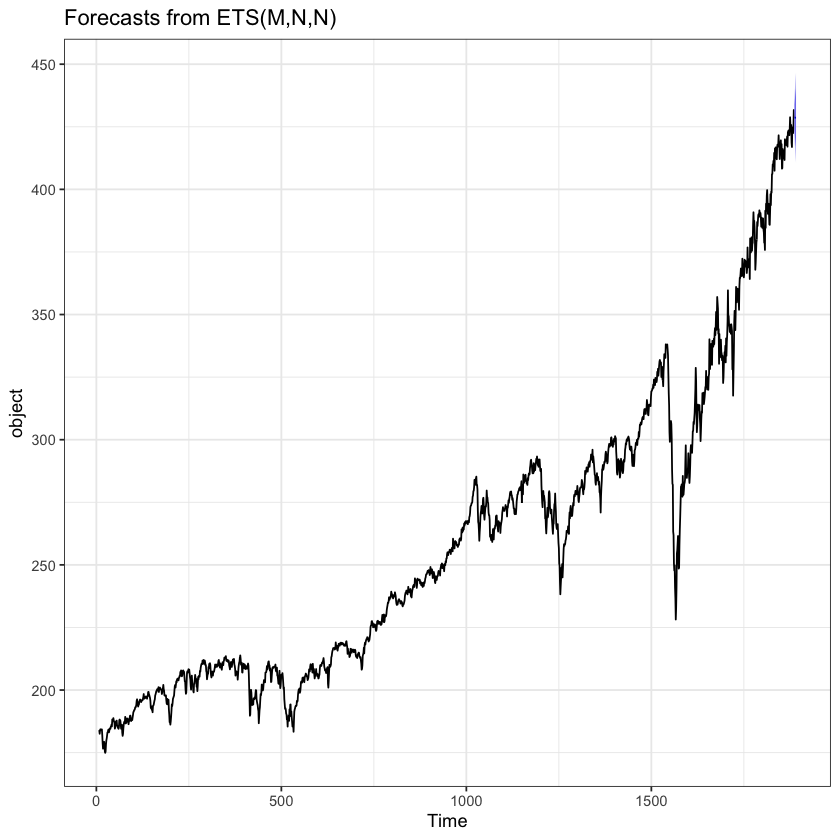

In [19]:
# 
##Predicción del primer modelo sin tendencia:
stats::predict(mod1$fitted.values, 5)

autoplot(predict(mod1$fitted.values, h=5))

<a id="9"></a> <br>
#### A. Bound test para la verificacion de relaciones a largo término
Esta prueba basada en la prueba de hipótesis de Wald, evalua si los coeficientes de rezagos son iguales a cero, o de lo contrario existe evidencia que alguno de ellos es diferente de cero (Pesaran et al. (2001)).

In [20]:
#Guardamos el mejor modelo obtenido en la sección anterior
modelo <- models$best_model
#Realizamos la prueba de hipotesis: Hipotesis nula: no cointegración
bounds_f_test(modelo, case = 2) # el parametro "case" igual a 2 verifica si existe relaciones a largo término, con la combinación de (restricted constant o intercepto cte, no linear trend o sin tendencia determinista).


	Bounds F-test (Wald) for no cointegration

data:  d(SPY) ~ L(SPY, 1) + L(AMZN, 1) + L(AAPL, 1) + L(META, 1) + d(L(SPY,     1)) + d(L(SPY, 2)) + d(AMZN) + d(L(AMZN, 1)) + d(L(AMZN,     2)) + d(L(AMZN, 3)) + d(L(AMZN, 4)) + d(L(AMZN, 5)) + d(AAPL) +     d(L(AAPL, 1)) + d(L(AAPL, 2)) + d(L(AAPL, 3)) + d(META) +     d(L(META, 1)) + d(L(META, 2)) + d(L(META, 3)) + d(L(META,     4))
F = 2.4672, p-value = 0.2591
alternative hypothesis: Possible cointegration
null values:
   k    T 
   3 1000 


Conclusión: No hay evidencia estadísticamente significativa de cointegración entre las variables bajo el modelo especificado (case = 2).

<a id="10"></a> <br>
#### B. Mutiplicadores de largo y corto termino
Esta función es clave para interpretar los efectos dinámicos de los regresores sobre la variable dependiente a través del tiempo. La función multipliers() del paquete ARDL calcula los multiplicadores de impacto dinámico y el multiplicador de largo plazo (long-run multiplier) del modelo ARDL. Como revisamos en la lectura, los multiplicadores son la suma de los coeficientes a largo o corto termino. En este sentido podemos calcular los multiplicadores usando la siguiente función:

In [21]:
#Multiplicadores a corto plazo
multipliers(modelo, type = "sr")
#Son los coeficientes que representan el impacto inmediato o dentro de unos pocos períodos (pero antes de alcanzar el equilibrio de largo plazo) 
#de los regresores exógenos sobre la variable dependiente.
#Indican cómo un cambio en una variable como AMZN afecta a SPY en los primeros períodos después del shock.
#Se basan en los coeficientes de los rezagos distribuidos de las variables explicativas.

,Term,Estimate,Std. Error,t value,Pr(>|t|)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,(Intercept),1.6458158,0.53439120,3.079796,2.101764e-03
2,AMZN,0.2650584,0.04077380,6.500704,1.024302e-10
3,AAPL,1.0743441,0.05121934,20.975361,7.596949e-88
4,META,0.1997393,0.01721886,11.600031,4.360747e-30


In [23]:
install.packages("msm")


Installing package into ‘/Users/U1037319/Library/R/arm64/4.2/library’
(as ‘lib’ is unspecified)

also installing the dependency ‘expm’





  There are binary versions available but the source versions are later:
      binary source needs_compilation
expm 0.999-9  1.0-0              TRUE
msm    1.7.1  1.8.2              TRUE



installing the source packages ‘expm’, ‘msm’




In [25]:
#Multiplicadores a largo plazo
multipliers(modelo)

ERROR: Error in loadNamespace(x): there is no package called ‘msm’


#Un cambio unitario de AMZN tiene un impacto de 0.033 en SPY en el largo plazo. Sin embargo, como el P valor es mayor a alfa, no hay evidencia del efecto de largo plazo de AMZN sobre SPY.
Sin embarog, para AAPL y META, si.